<a href="https://colab.research.google.com/github/Codes-of-Hermit/Finance_codes/blob/main/Optimized_Portfolio_Allocation_High_Reward%2C_Low_Risk_Investment_Strategy_with_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Enter the stock tickers separated by comma (e.g., AAPL, MSFT, GOOG): AAP,MSFT,NVDA,AMD,INTC,TSLA
Enter the number of companies: 6
Enter the investment amount: 15000


[*********************100%%**********************]  6 of 6 completed


Optimized Portfolio Return: 60.88%
Optimized Portfolio Risk: 40.88%
Optimized Portfolio Weights: [2.05820013e-18 1.45864276e-01 9.33680142e-18 1.91683560e-01
 5.85368130e-01 7.70840342e-02]


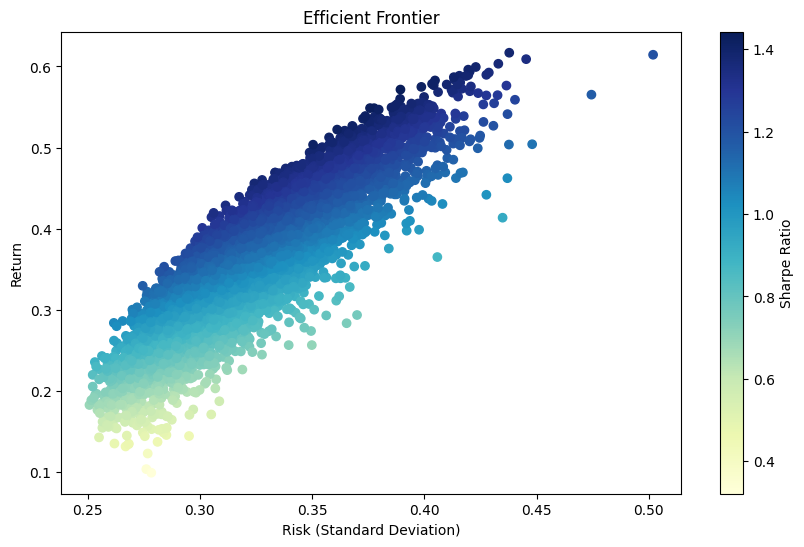

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

def fetch_data(tickers, start_date, end_date):
    # Download historical data for the specified tickers
    data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']
    return data

def calculate_annual_return_and_covariance(data):
    # Calculate daily returns
    daily_returns = data.pct_change().dropna()

    # Calculate annualized returns
    annual_returns = daily_returns.mean() * 252

    # Calculate annualized covariance matrix
    annual_covariance = daily_returns.cov() * 252

    return annual_returns, annual_covariance

def portfolio_performance(weights, returns, covariance):
    # Calculate portfolio return
    portfolio_return = np.sum(weights * returns)

    # Calculate portfolio risk (standard deviation)
    portfolio_risk = np.sqrt(np.dot(weights.T, np.dot(covariance, weights)))

    return portfolio_return, portfolio_risk

def negative_sharpe_ratio(weights, returns, covariance, risk_free_rate=0.01):
    p_return, p_risk = portfolio_performance(weights, returns, covariance)
    sharpe_ratio = (p_return - risk_free_rate) / p_risk
    return -sharpe_ratio

def optimize_portfolio(returns, covariance, num_assets):
    # Initial guess for the weights (equally distributed)
    init_guess = num_assets * [1. / num_assets,]

    # Constraints: the sum of weights is 1
    constraints = ({'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1})

    # Bounds for the weights (between 0 and 1)
    bounds = tuple((0, 1) for asset in range(num_assets))

    # Optimize portfolio
    optimized = minimize(negative_sharpe_ratio, init_guess, args=(returns, covariance), method='SLSQP', bounds=bounds, constraints=constraints)

    return optimized

def display_portfolio_performance(weights, returns, covariance):
    p_return, p_risk = portfolio_performance(weights, returns, covariance)
    print(f"Optimized Portfolio Return: {p_return * 100:.2f}%")
    print(f"Optimized Portfolio Risk: {p_risk * 100:.2f}%")
    print(f"Optimized Portfolio Weights: {weights}")

def plot_efficient_frontier(returns, covariance, num_portfolios=10000, risk_free_rate=0.01):
    num_assets = len(returns)
    results = np.zeros((3, num_portfolios))

    for i in range(num_portfolios):
        # Random weights for the portfolio
        weights = np.random.random(num_assets)
        weights /= np.sum(weights)

        # Portfolio performance
        p_return, p_risk = portfolio_performance(weights, returns, covariance)

        # Store the results
        results[0, i] = p_risk
        results[1, i] = p_return
        results[2, i] = (p_return - risk_free_rate) / p_risk

    # Plotting the efficient frontier
    plt.figure(figsize=(10, 6))
    plt.scatter(results[0], results[1], c=results[2], cmap='YlGnBu', marker='o')
    plt.colorbar(label='Sharpe Ratio')
    plt.title('Efficient Frontier')
    plt.xlabel('Risk (Standard Deviation)')
    plt.ylabel('Return')
    plt.show()

if __name__ == "__main__":
    # User inputs
    tickers = input("Enter the stock tickers separated by comma (e.g., AAPL, MSFT, GOOG): ").split(',')
    num_companies = int(input("Enter the number of companies: "))
    investment_amount = float(input("Enter the investment amount: "))

    # Fetch data
    start_date = '2016-01-01'
    end_date = '2024-05-30'
    data = fetch_data(tickers, start_date, end_date)

    # Calculate returns and covariance
    returns, covariance = calculate_annual_return_and_covariance(data)

    # Optimize portfolio
    optimized = optimize_portfolio(returns, covariance, num_companies)

    # Display performance
    display_portfolio_performance(optimized.x, returns, covariance)

    # Plot efficient frontier
    plot_efficient_frontier(returns, covariance)
